# 
## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.


## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir("C:/Users/nisha pujari/Documents/nisha study ds/machine learning/ML Assignment 1/ML Assignment 1")

In [3]:
df=pd.read_csv("petrol.csv",encoding="unicode_escape")

In [6]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


<AxesSubplot:xlabel='Petrol_tax', ylabel='Density'>

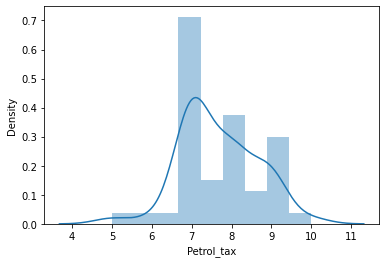

In [9]:
sns.distplot(df["Petrol_tax"])

<AxesSubplot:xlabel='Average_income', ylabel='Density'>

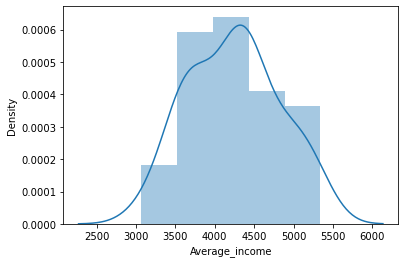

In [10]:
sns.distplot(df["Average_income"])

<AxesSubplot:xlabel='Paved_Highways', ylabel='Density'>

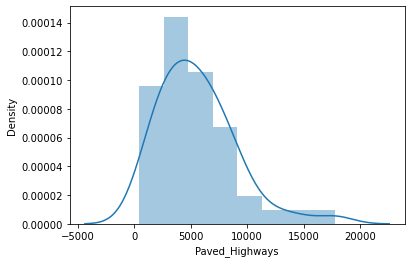

In [11]:
sns.distplot(df["Paved_Highways"])

<AxesSubplot:xlabel='Population_Driver_licence(%)', ylabel='Density'>

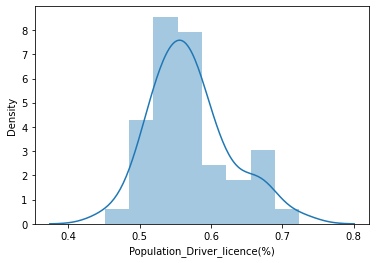

In [12]:
sns.distplot(df["Population_Driver_licence(%)"])

<AxesSubplot:xlabel='Petrol_Consumption', ylabel='Density'>

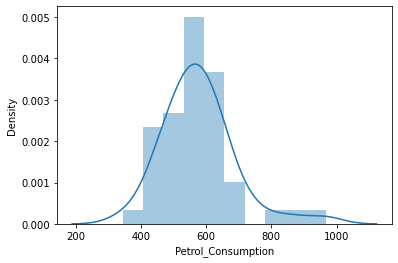

In [13]:
sns.distplot(df["Petrol_Consumption"])

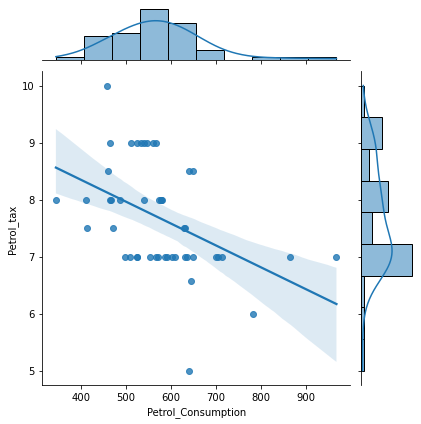

In [14]:
sns.jointplot(df["Petrol_Consumption"],df["Petrol_tax"], kind="reg")

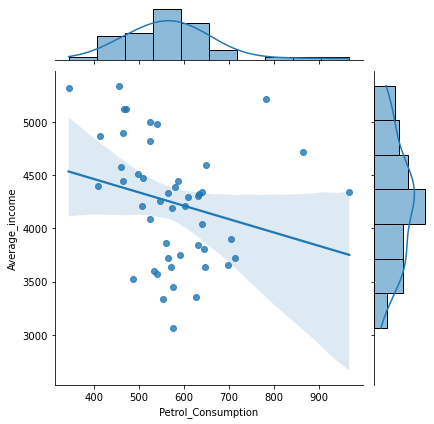

In [15]:
sns.jointplot(df["Petrol_Consumption"],df["Average_income"], kind="reg")

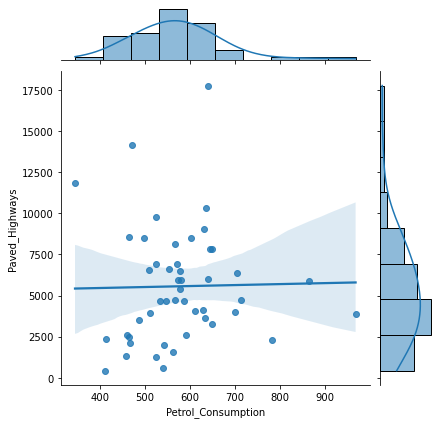

In [16]:
sns.jointplot(df["Petrol_Consumption"],df["Paved_Highways"], kind="reg")

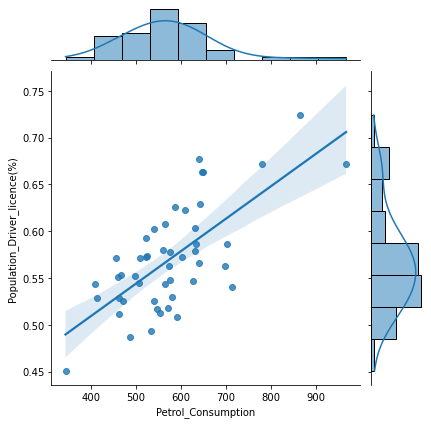

In [17]:
sns.jointplot(df["Petrol_Consumption"],df["Population_Driver_licence(%)"], kind="reg")

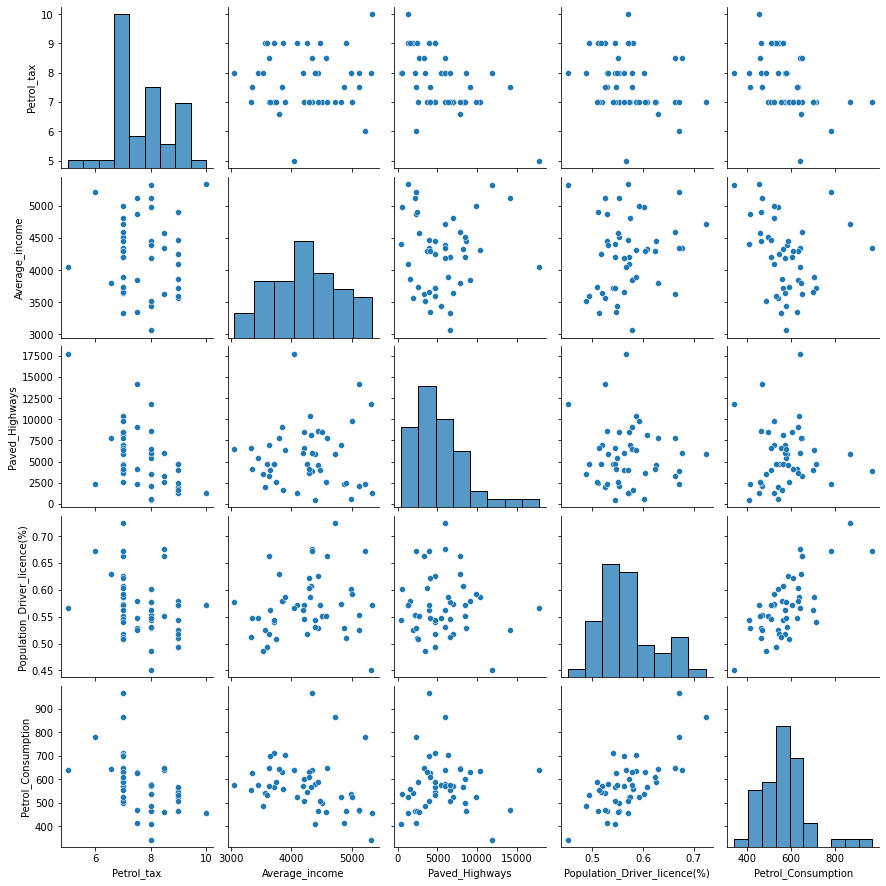

In [18]:
sns.pairplot(df)

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [19]:
#Petrol_tax
Q3=np.percentile(df["Petrol_tax"],75)
Q1=np.percentile(df["Petrol_tax"],25)

IQR1=Q3-Q1
min_cap1=Q1-1.5*IQR1
max_cap1=Q3+1.5*IQR1

In [20]:
df["Petrol_tax1"]=np.where(df["Petrol_tax"]>max_cap1,max_cap1,
                         np.where(df["Petrol_tax"]<min_cap1,min_cap1,df["Petrol_tax"]))

<AxesSubplot:xlabel='Petrol_tax'>

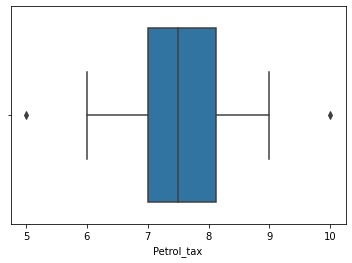

In [21]:
sns.boxplot(df["Petrol_tax"])

<AxesSubplot:xlabel='Petrol_tax1'>

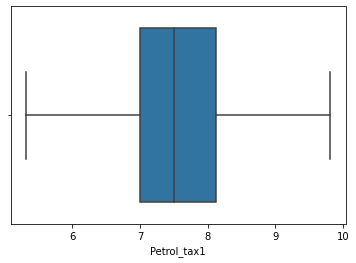

In [22]:
sns.boxplot(df["Petrol_tax1"])

In [23]:
#Average_income
qq3=np.percentile(df["Average_income"],75)
qq1=np.percentile(df["Average_income"],25)

IQR2=qq3-qq1
min_cap2=qq1-1.5*IQR2
max_cap2=qq3+1.5*IQR2
print(min_cap2)
print(max_cap2)

2479.375
5838.375


In [24]:
print(df[df["Average_income"]>max_cap2].shape[0])
print(df[df["Average_income"]<min_cap2].shape[0])

0
0


<AxesSubplot:xlabel='Average_income1'>

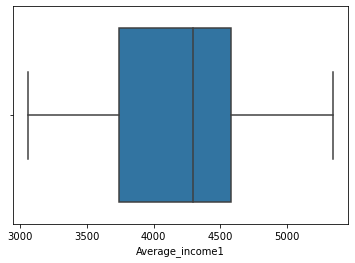

In [25]:
df["Average_income1"]=np.where(df["Average_income"]>max_cap2,max_cap2,
                         np.where(df["Average_income"]<min_cap2,min_cap2,df["Average_income"]))

sns.boxplot(df["Average_income1"])

<AxesSubplot:xlabel='Average_income'>

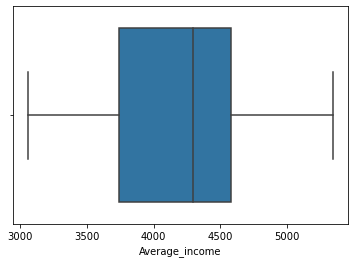

In [26]:
sns.boxplot(df["Average_income"])

<AxesSubplot:xlabel='Paved_Highways1'>

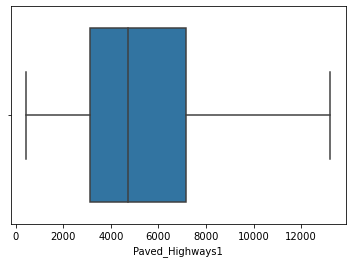

In [27]:
#Paved_Highways
q3=np.percentile(df["Paved_Highways"],75)
q1=np.percentile(df["Paved_Highways"],25)

IQR3=q3-q1
min_cap3=q1-1.5*IQR3
max_cap3=q3+1.5*IQR3

df["Paved_Highways1"]=np.where(df["Paved_Highways"]>max_cap3,max_cap3,
                         np.where(df["Paved_Highways"]<min_cap3,min_cap3,df["Paved_Highways"]))

sns.boxplot(df["Paved_Highways1"])

<AxesSubplot:xlabel='Paved_Highways'>

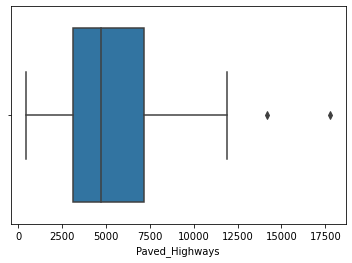

In [28]:
sns.boxplot(df["Paved_Highways"])

<AxesSubplot:xlabel='Population_Driver_Licence_d(%)'>

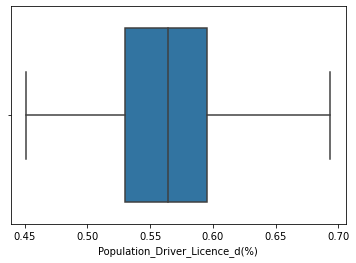

In [29]:
#Population_Driver_licence(%)
QQ3=np.percentile(df["Population_Driver_licence(%)"],75)
QQ1=np.percentile(df["Population_Driver_licence(%)"],25)

IQR4=QQ3-QQ1
min_cap4=QQ1-1.5*IQR4
max_cap4=QQ3+1.5*IQR4

df["Population_Driver_Licence_d(%)"]=np.where(df["Population_Driver_licence(%)"]>max_cap4,max_cap4,
                         np.where(df["Population_Driver_licence(%)"]<min_cap4,min_cap4,df["Population_Driver_licence(%)"]))

sns.boxplot(df["Population_Driver_Licence_d(%)"])

<AxesSubplot:xlabel='Population_Driver_licence(%)'>

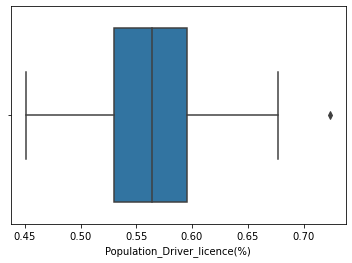

In [30]:
sns.boxplot(df["Population_Driver_licence(%)"])

<AxesSubplot:xlabel='Petrol_Consumption1'>

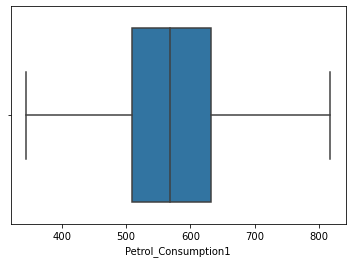

In [31]:
#Population_Driver_licence(%)
qqq3=np.percentile(df["Petrol_Consumption"],75)
qqq1=np.percentile(df["Petrol_Consumption"],25)

IQR5=qqq3-qqq1
min_cap5=qqq1-1.5*IQR5
max_cap5=qqq3+1.5*IQR5

df["Petrol_Consumption1"]=np.where(df["Petrol_Consumption"]>max_cap5,max_cap5,
                         np.where(df["Petrol_Consumption"]<min_cap5,min_cap5,df["Petrol_Consumption"]))

sns.boxplot(df["Petrol_Consumption1"])

<AxesSubplot:xlabel='Petrol_Consumption'>

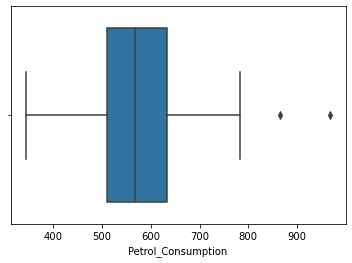

In [32]:
sns.boxplot(df["Petrol_Consumption"])

In [33]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption', 'Petrol_tax1',
       'Average_income1', 'Paved_Highways1', 'Population_Driver_Licence_d(%)',
       'Petrol_Consumption1'],
      dtype='object')

In [34]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%),Petrol_Consumption1
0,9.0,3571,1976,0.525,541,9.0,3571.0,1976.0,0.525,541.0
1,9.0,4092,1250,0.572,524,9.0,4092.0,1250.0,0.572,524.0
2,9.0,3865,1586,0.580,561,9.0,3865.0,1586.0,0.580,561.0
3,7.5,4870,2351,0.529,414,7.5,4870.0,2351.0,0.529,414.0
4,8.0,4399,431,0.544,410,8.0,4399.0,431.0,0.544,410.0


In [35]:
df1=df.drop(["Petrol_tax","Average_income","Paved_Highways","Population_Driver_licence(%)","Petrol_Consumption"], axis=1)
df1.head()

,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%),Petrol_Consumption1
0,9.0,3571.0,1976.0,0.525,541.0
1,9.0,4092.0,1250.0,0.572,524.0
2,9.0,3865.0,1586.0,0.580,561.0
3,7.5,4870.0,2351.0,0.529,414.0
4,8.0,4399.0,431.0,0.544,410.0


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Petrol_tax1                     48 non-null     float64
 1   Average_income1                 48 non-null     float64
 2   Paved_Highways1                 48 non-null     float64
 3   Population_Driver_Licence_d(%)  48 non-null     float64
 4   Petrol_Consumption1             48 non-null     float64
dtypes: float64(5)
memory usage: 2.0 KB


In [37]:
df1.corr()

,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%),Petrol_Consumption1
Petrol_tax1,1.000000,0.002284,-0.482466,-0.297521,-0.480891
Average_income1,0.002284,1.000000,0.056171,0.151911,-0.288841
Paved_Highways1,-0.482466,0.056171,1.000000,-0.067107,0.025307
Population_Driver_Licence_d(%),-0.297521,0.151911,-0.067107,1.000000,0.689113
Petrol_Consumption1,-0.480891,-0.288841,0.025307,0.689113,1.000000


In [38]:
df1.describe()

,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%),Petrol_Consumption1
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.670937,4241.833333,5450.442708,0.569698,572.651042
std,0.923415,573.623768,3149.104278,0.053823,99.726961
min,5.312500,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,9.812500,5342.000000,13224.625000,0.693500,817.625000


In [39]:
df2=df1.drop(["Average_income1","Paved_Highways1","Petrol_tax1"], axis=1)
df2.head()

,Population_Driver_Licence_d(%),Petrol_Consumption1
0,0.525,541.0
1,0.572,524.0
2,0.580,561.0
3,0.529,414.0
4,0.544,410.0


# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [40]:
X=df2.drop(["Petrol_Consumption1"], axis=1)

In [41]:
X.shape

(48, 1)

In [42]:
Y=df2["Petrol_Consumption1"]

In [43]:
Y.shape

(48,)

# Question 4 - Split data into train, test sets

#Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 1)
(10, 1)
(38,)
(10,)


# Question 5 - Build Model


Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [47]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [48]:
LR.intercept_

-205.8861518709266

In [49]:
LR.coef_

array([1362.59219793])

In [50]:
coef_LR=pd.DataFrame(LR.coef_,X_train.columns, columns=["Coefficient"])
coef_LR

,Coefficient
Population_Driver_Licence_d(%),1362.592198


In [51]:
y_predict= np.round(LR.predict(X_test))
y_predict

array([466., 535., 541., 500., 582., 593., 458., 647., 548., 516.])

In [52]:
pd.DataFrame({"Actual":y_test,"Predicted":y_predict})

,Actual,Predicted
29,534.0,466.0
4,410.0,535.0
26,577.0,541.0
30,571.0,500.0
32,577.0,582.0
37,704.0,593.0
34,487.0,458.0
40,587.0,647.0
7,467.0,548.0
10,580.0,516.0


# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

In [53]:
from sklearn.metrics import accuracy_score, r2_score

print("Accuracy_score:",accuracy_score(y_test,y_predict))
print("R2_Score:", r2_score(y_test,y_predict))

Accuracy_score: 0.0
R2_Score: 0.07789822918231093


# Question 7: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [54]:
df1.head()

,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%),Petrol_Consumption1
0,9.0,3571.0,1976.0,0.525,541.0
1,9.0,4092.0,1250.0,0.572,524.0
2,9.0,3865.0,1586.0,0.580,561.0
3,7.5,4870.0,2351.0,0.529,414.0
4,8.0,4399.0,431.0,0.544,410.0


In [55]:
X=df1.drop(["Petrol_Consumption1"], axis=1)
Y=df1["Petrol_Consumption1"]

In [56]:
print(X.shape,Y.shape)

(48, 4) (48,)


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 4)
(10, 4)
(38,)
(10,)


In [60]:
#MinMaxScaling

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train[["Petrol_tax1","Average_income1","Paved_Highways1","Population_Driver_Licence_d(%)"]]=mms.fit_transform(X_train)
X_train.describe()

,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%)
count,38.000000,38.000000,38.000000,38.000000
mean,0.516550,0.490058,0.400785,0.514867
std,0.220008,0.270843,0.266514,0.227718
min,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.257715,0.172765,0.371134
50%,0.430556,0.485814,0.327468,0.494845
75%,0.708333,0.673096,0.592250,0.625773
max,1.000000,1.000000,1.000000,1.000000


In [61]:
X_test[["Petrol_tax1","Average_income1","Paved_Highways1","Population_Driver_Licence_d(%)"]]=mms.transform(X_test)
X_test.describe()

,Petrol_tax1,Average_income1,Paved_Highways1,Population_Driver_Licence_d(%)
count,10.000000,10.000000,10.000000,10.000000
mean,0.552778,0.309209,0.320734,0.392990
std,0.140546,0.308872,0.165494,0.176085
min,0.375000,-0.134395,-0.013547,0.148454
25%,0.430556,0.106147,0.251849,0.288660
50%,0.597222,0.216775,0.350363,0.391753
75%,0.597222,0.529617,0.449312,0.497938
max,0.819444,0.892484,0.499341,0.721649


In [62]:
LR.fit(X_train,y_train)

LinearRegression()

# Question 8: Print the coefficients of the multilinear regression model

In [63]:
LR.intercept_

608.4979232372654

In [64]:
LR.coef_

array([-175.41738908, -132.69720628,  -57.71880367,  289.48392219])

In [65]:
coef_LR=pd.DataFrame(LR.coef_,X_train.columns, columns=["Coefficient"])
coef_LR

,Coefficient
Petrol_tax1,-175.417389
Average_income1,-132.697206
Paved_Highways1,-57.718804
Population_Driver_Licence_d(%),289.483922


In [66]:
y_predict= np.round(LR.predict(X_test))
y_predict

array([479., 545., 590., 574., 646., 640., 521., 659., 500., 504.])

In [67]:
pd.DataFrame({"Actual":y_test,"Predicted":y_predict})

,Actual,Predicted
29,534.0,479.0
4,410.0,545.0
26,577.0,590.0
30,571.0,574.0
32,577.0,646.0
37,704.0,640.0
34,487.0,521.0
40,587.0,659.0
7,467.0,500.0
10,580.0,504.0


# Question 9 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

In [68]:
print("Accuracy_score:",accuracy_score(y_test,y_predict))
print("R2_Score:", r2_score(y_test,y_predict))

Accuracy_score: 0.0
R2_Score: 0.2577789003727319


The R2_score (7.78%) with Single Linear Regression is less compared to R2_score (25.78%) obtained by using Multi-Linear Regression model along with Standard Scaler.